# **Part 2: Road Lane Detection Using Hough Transform**

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import imutils
from scipy.ndimage import maximum_filter

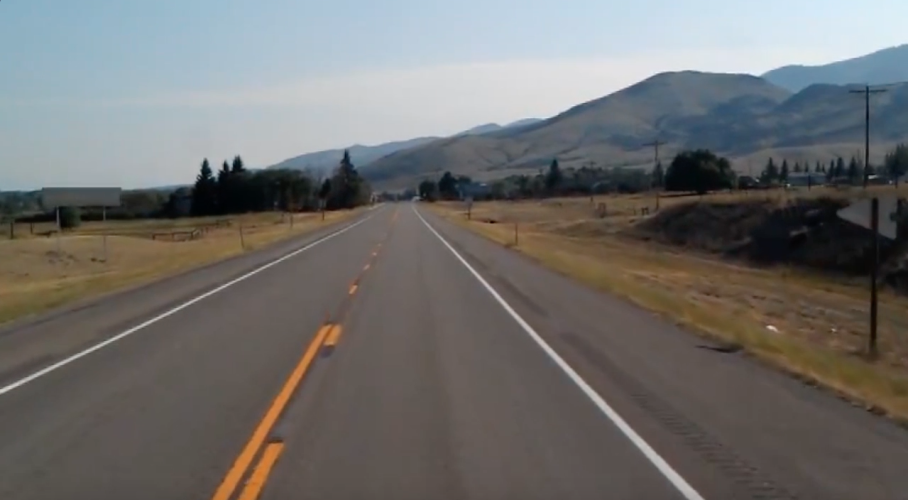

In [ ]:
# Load image
img = cv2.imread('/content/lane.png')

# Resize for better visualization
img = imutils.resize(img, height=500)
cv2_imshow(img) # Diaplay the original image

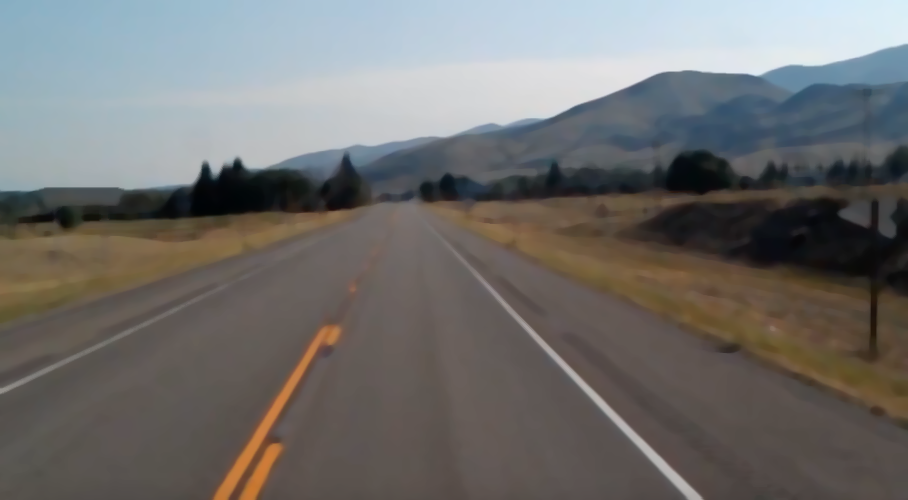

In [ ]:
# Apply median filter to reduce noise
smoothed_img = cv2.medianBlur(img, 9)
cv2_imshow(smoothed_img) # Display smoothed image

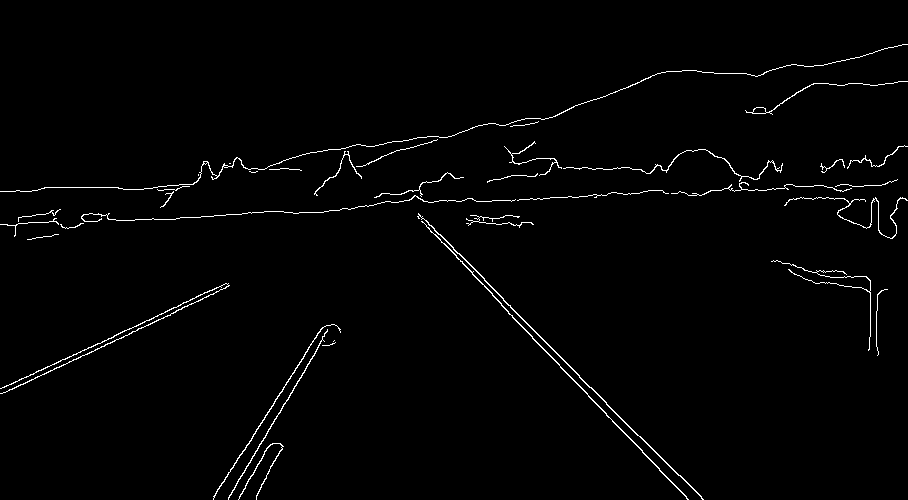

In [ ]:
# Apply Canny's Algorithm for edge detection
canny_low = 5
canny_high = 150
edge_detect = cv2.Canny(smoothed_img, canny_low, canny_high)
cv2_imshow(edge_detect) # Diaplay the detected edges

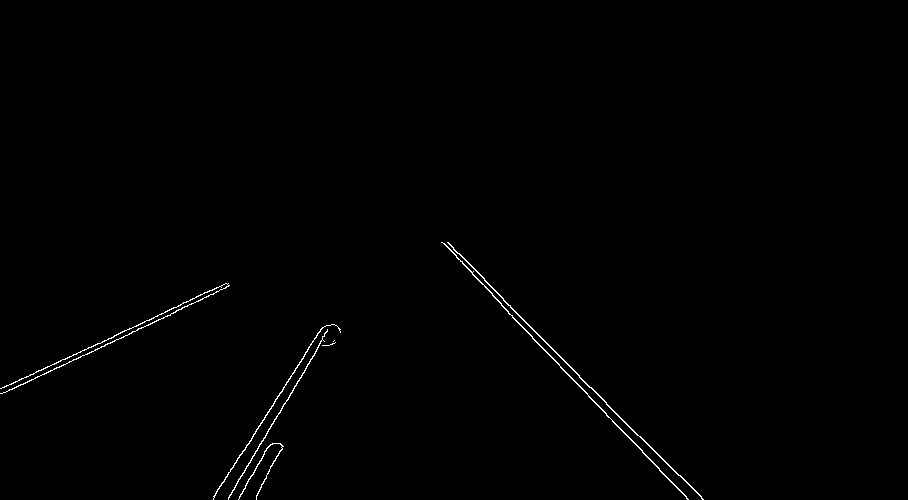

In [ ]:
def get_ROI(edge_detect):

  # Extract the width and height of the image
  height, width = edge_detect.shape

  # ROI of using a polygon with specific dimensions
  polygon = np.array([[
      (int(width * 0.001), height),  # Bottom left corner
      (int(width * 0.001), int(height * 0.5)),  # Top left middle (left lane marker)
      (int(width * 0.62), int(height * 0.48)),  # Top right middle (right lane marker)   ## 0.45   0.41
      (int(width * 0.89), height)  # Bottom right corner  ## 0.8
  ]], dtype=np.int32)

  # ROI of "lane2.jpg"
  # polygon = np.array([[
  #     (int(width * 0.001), height),  # Bottom left corner
  #     (int(width * 0.5), int(height * 0.52)),  # Top left middle (left lane marker)
  #     (int(width * 0.6), int(height * 0.41)),  # Top right middle (right lane marker)
  #     (int(width * 0.9), height)  # Bottom right corner
  # ]], dtype=np.int32)
  return polygon

polygon = get_ROI(edge_detect)

# Create a blank mask and fill the region of interest with white
mask = np.zeros_like(edge_detect)
cv2.fillPoly(mask, polygon, 255)
# cv2_imshow(mask)

# Apply the mask to the edge-detected image using bitwise and
masked_edges = cv2.bitwise_and(edge_detect, mask)
cv2_imshow(masked_edges)

In [ ]:
# Implementation of Hough Transform
def hough_transform(edge_image):
  # Parameters
  height, width = edge_image.shape
  theta_res = 180  # Max value of theta
  theta = np.deg2rad(np.arange(0, theta_res)) # Range of theta values (0 to 180 degrees)
  diag_len = int(np.sqrt(height**2 + width**2))  # Maximum possible distance
  rho_range = 2 * diag_len  # Range of rho values
  accumulator = np.zeros((rho_range, theta_res), dtype=np.int32) # Initialize the accumulator array (rho range x theta range)

  # Find edges' points
  y_idxs, x_idxs = np.nonzero(edge_image)

  # Cosine and Sine values for theta
  cos_t = np.cos(theta)
  sin_t = np.sin(theta)

  # Implement the Hough Transform algorithm
  for i in range(len(x_idxs)):
      x = x_idxs[i]
      y = y_idxs[i]
      rho_values = (x * cos_t + y * sin_t).astype(int) + diag_len
      accumulator[rho_values, np.arange(theta_res)] += 1

  # Parameters for finding local maxima
  neighborhood_size = 5
  threshold = 80  # Minimum votes to consider a peak

  # Apply a maximum filter to find local maxima
  filtered_accumulator = maximum_filter(accumulator, size=neighborhood_size)
  local_maxima = (accumulator == filtered_accumulator) & (accumulator > threshold)

  # Extract the indices of the local maxima
  rho_indices, theta_indices = np.nonzero(local_maxima)

  # Convert the indices to actual (theta, rho) values
  theta_values = np.rad2deg(theta[theta_indices])
  rho_values = rho_indices - diag_len

  return accumulator, theta_values, rho_values

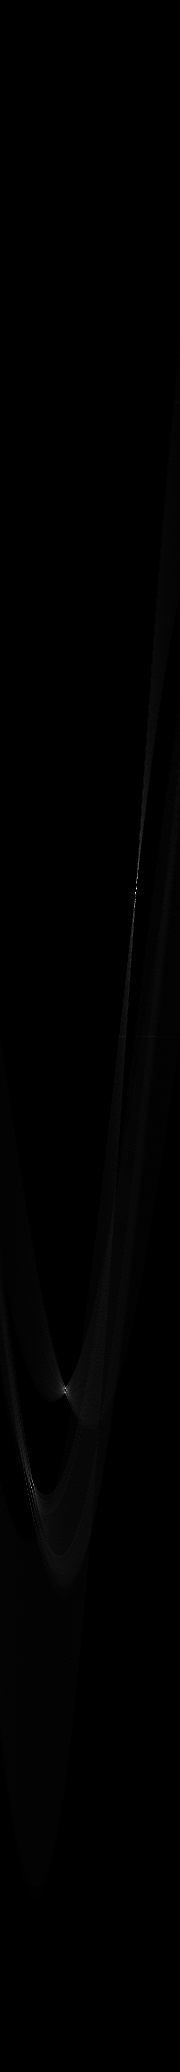

In [ ]:
acc_array, theta_values, rho_values= hough_transform(masked_edges)
cv2_imshow(acc_array)

In [ ]:
# Parameters
line_color = (0, 255, 0)
line_thickness = 2

def draw_lines(lane_img, theta_values, rho_values):
  height= lane_img.shape[0]

  # Draw each line on the image
  for t, r in zip(theta_values, rho_values):
      theta_rad = np.deg2rad(t)  # Convert theta to radians

      # Calculate the line centers for visualization
      a = np.cos(theta_rad)
      b = np.sin(theta_rad)
      x0 = int(a * r)
      y0 = int(b * r)

      # Adjust the center point
      if y0 < 0:
        x0 = int(x0 - 1000 * (-b))
        y0 = int(y0 - 1000 * (a))

      elif y0 > height/2:
        x0 = int(x0 - 100 * (-b))
        y0 = int(y0 - 100 * (a))

      elif y0 < height/2:
        x0 = int(x0 + 50 * (-b))
        y0 = int(y0 + 50 * (a))

      # Define two points along the line to cover the image
      x1 = int(x0 + 500 * (-b))
      y1 = int(y0 + 500 * (a))
      x2 = int(x0 - 10 * (-b))
      y2 = int(y0 - 10 * (a))

      # Draw the line on the image
      lane_img = cv2.line(lane_img, (x1, y1), (x2, y2), line_color, line_thickness)

  return lane_img

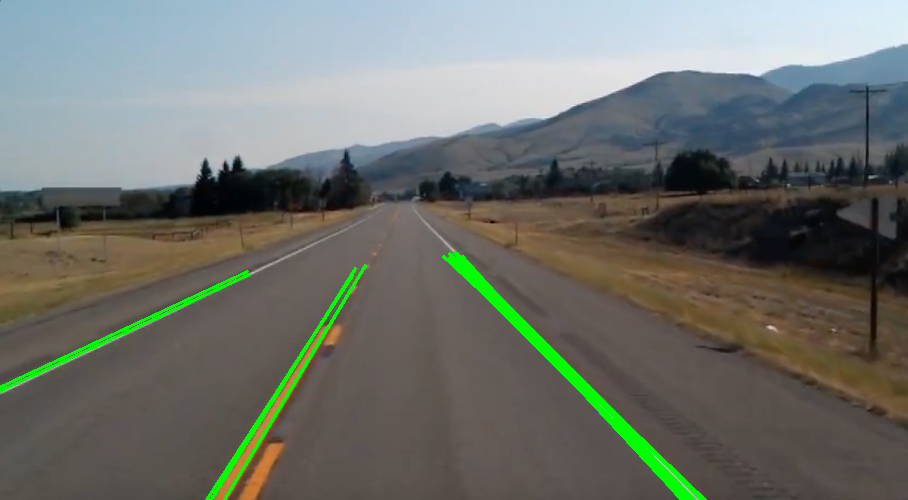

In [ ]:
lane_img = img.copy()     # Create a copy of the original image
lane_img = draw_lines(lane_img, theta_values, rho_values)
cv2_imshow(lane_img)

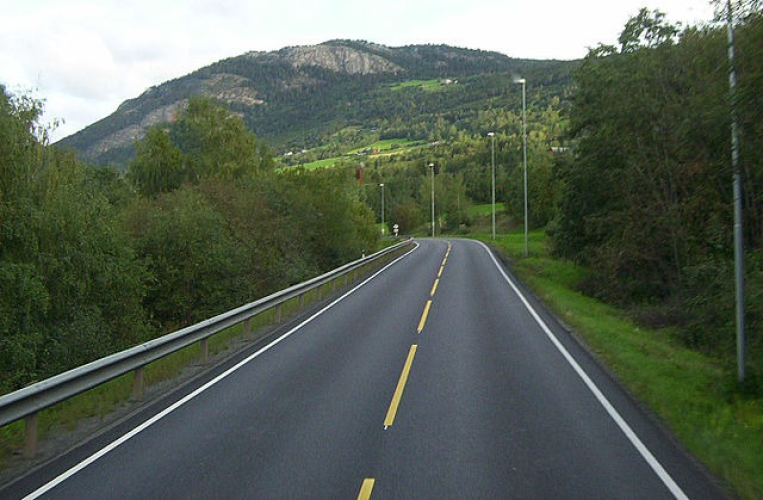

In [ ]:
img2 = cv2.imread('/content/lane2.jpg')
img2 = imutils.resize(img2, height=500)
cv2_imshow(img2)

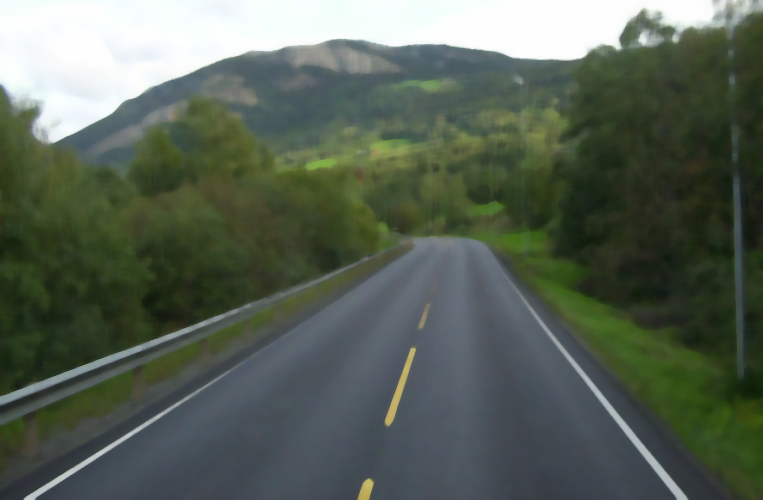

In [ ]:
smoothed_img2 = cv2.medianBlur(img2, 9)
cv2_imshow(smoothed_img2)

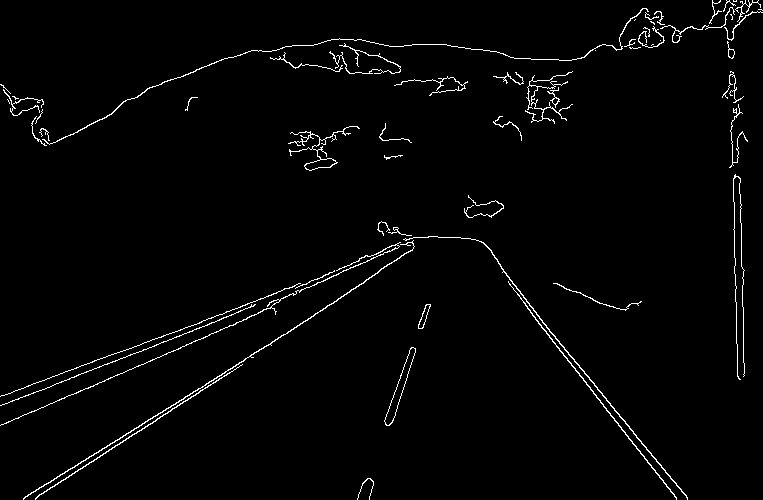

In [ ]:
edge_detect2 = cv2.Canny(smoothed_img2, canny_low, canny_high)
cv2_imshow(edge_detect2)

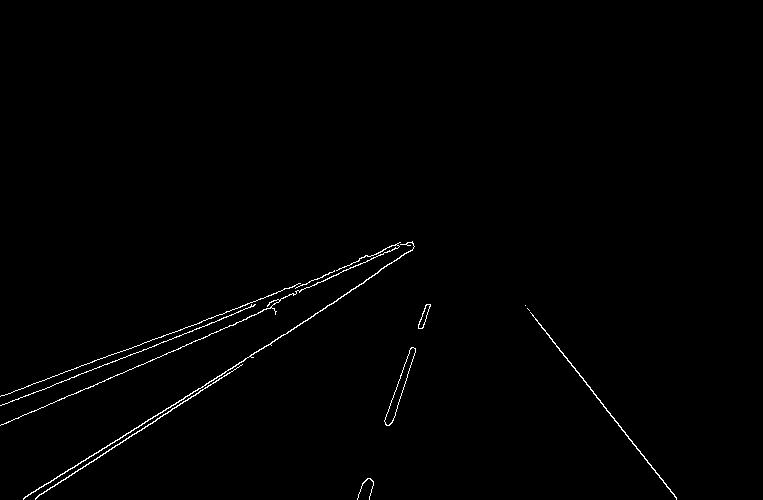

In [ ]:
polygon = get_ROI(edge_detect2)

mask2 = np.zeros_like(edge_detect2)
cv2.fillPoly(mask2, polygon, 255)
# cv2_imshow(mask2)

masked_edges2 = cv2.bitwise_and(edge_detect2, mask2)
cv2_imshow(masked_edges2)

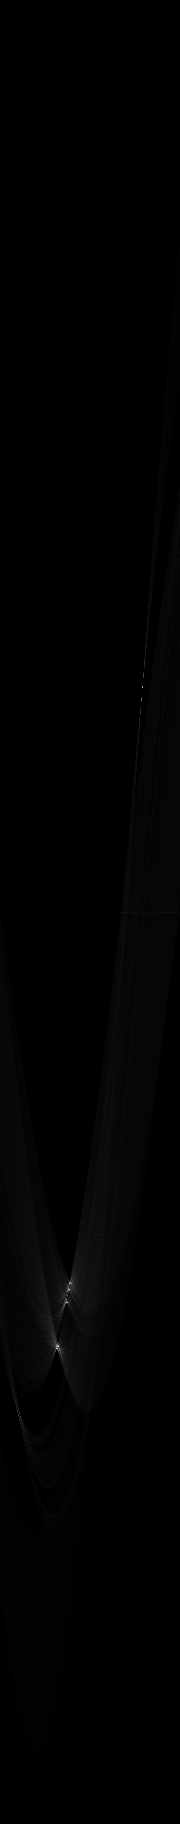

In [ ]:
acc_array2, theta_values2, rho_values2= hough_transform(masked_edges2)
cv2_imshow(acc_array2)

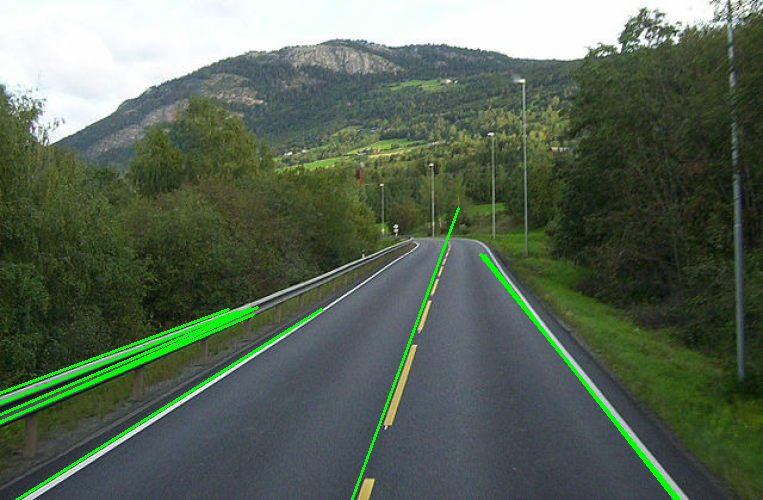

In [ ]:
lane_img2 = img2.copy()     # Create a copy of the original image
lane_img2 = draw_lines(lane_img2, theta_values2, rho_values2)
cv2_imshow(lane_img2)